In [1]:
# UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE 
# Ano: 2019
# Projeto: Virtual Mood Identifier
# Autor: Alysson Rafael Oliveira de Lima
#
# Aplicando a rede SOM nos tweets categorizados para dividir e gerar um padrão de sentimentos.

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.2-cp36-none-any.whl size=7263 sha256=847e238b5038079b8c1a752ac70e2a3737f3a4c781276230fcc2d140aac52145
  Stored in directory: /root/.cache/pip/wheels/4a/46/e1/605a71c70f6a19f16b44fc309f6557127591c69969476cf5d1
Successfully built minisom


In [2]:
#Lendo a base de dados.
dataset = pd.read_csv('https://raw.githubusercontent.com/alyssonolima/Projeto-Virtual-Mood-Identifier/master/Dados/tweets_categorizados.csv')
#dataset = pd.read_csv('https://raw.githubusercontent.com/alyssonolima/Projeto-Virtual-Mood-Identifier/master/Dados/tweets_Donald_Trump_categorizados.csv')
#dataset = pd.read_csv('https://raw.githubusercontent.com/alyssonolima/Projeto-Virtual-Mood-Identifier/master/Dados/tweets_Barack_Obama_categorizados.csv')

#Exibe os 10
dataset.head( 10 )

,Unnamed: 0,tweets,compound,negativos,neutro,positivo
0,0,"""teste""",0.0000,0.000,1.000,0.000
1,1,RT @WhiteHouse: LIVE: President @realDonaldTru...,0.2960,0.000,0.804,0.196
2,2,"...love to have Mike Pompeo, Rick Perry, Mick ...",-0.7177,0.140,0.860,0.000
3,3,...lawyer has already stated that I did nothin...,0.3724,0.000,0.943,0.057
4,4,The D.C. Wolves and Fake News Media are readin...,-0.7269,0.165,0.787,0.048
5,5,RT @DailyCaller: President @realDonaldTrump si...,0.0000,0.000,1.000,0.000
6,6,RT @DailyCaller: Adam Schiff Challenger Jennif...,-0.6249,0.242,0.693,0.065
7,7,RT @DailyCaller: The Tide Is Turning Against D...,0.0000,0.000,1.000,0.000
8,8,RT @DailyCaller: Poll: Independents Flip On Im...,0.0000,0.000,1.000,0.000
9,9,When the Military rips down an old &amp; badly...,0.3707,0.100,0.759,0.141


In [0]:
#Pegando os dados necessários
X = dataset.iloc[:,[2,3,4,5]].values


In [0]:
#tamanho da rede
tx = 4
ty = 4

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = tx, y = ty, input_len = 4, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

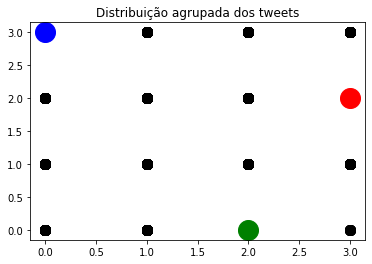

In [5]:
#compount negativos	neutro	positivo
negativo = [-0.6229, 1., 0., 0.] #Frase: BAD!!
neutro   = [0., 0., 1., 0.]
positivo = [0.6467, 0., 0., 1.] #Frase: HAPPY!!

import matplotlib
import matplotlib.pyplot as plt

# matriz de zeros para o contador de totais 
MT = np.zeros((tx,ty))

fig, ax = plt.subplots()
ax.set_title('Distribuição agrupada dos tweets')

for i in X:
  pos = som.winner(i)
  ax.plot(pos[0], pos[1], 'o' ,color="black", markersize=10)  
  MT[pos] += 1

#plota um teeter 100% Positivo
pos = som.winner(positivo)
ax.plot(pos[0], pos[1], 'o' ,color="green", markersize=20)

#plota um tweeter 100% negativo
pos = som.winner(negativo)
ax.plot(pos[0], pos[1], 'o' ,color="red", markersize=20)

#plota um tweeter 100% neutro
pos = som.winner(neutro)
ax.plot(pos[0], pos[1], 'o' ,color="blue", markersize=20 )

plt.show()

In [6]:
print("Total:")
print(MT)

Total:
[[128.  99.  92. 274.]
 [ 57.  56.  43.  58.]
 [ 16.  40.  70. 108.]
 [  8.  28.  34.  88.]]
